# Configure the model architecture and training parameters

This tutorial provides a step-by-step guide on configuring the model architectures, training hyperparameters, and analysis of time-series single dataset using UNAGI. We demonstrate the capabilities of UNAGI by applying it to scRNA-seq data sampled from a single-nuclei RNA sequencing data.




In [1]:
import os
import shutil
from UNAGI import UNAGI
import warnings


warnings.filterwarnings('ignore')
unagi = UNAGI()

## Part 1: Setup and load the datasets

After loading UNAGI package, we need to setup the data for UNAGI training.

-   We need to specify the data path of your h5ad files after stage segmentation. e.g. '../data/small/0.h5ad'. Then UNAGI will load all h5ad files in the target directory. 

-   UNAGI requires the total number of time-points the dataset has as the input. e.g. total_stage=4

-   UNAGI requires the key of time-points attribute in the annData.obs table.

-   If the dataset is not splited into individual stages, you can specify the splited_dataset as False to segment the dataset.

-   To build the K-Nearest Neighbors (KNN) connectivity matrix in Graph convolution training, the neighbors number of KNN should be defined. The default value is 25. 

-   You can also specify how many threads you want to use when using UNAGI. The default number of threads is 20. 

In [2]:
# Path to the folder containing the items
path = '../UNAGI/data/example/'

# List of folders to remove
folders_to_remove = ['0', 'model_save']

for folder in folders_to_remove:
    folder_path = os.path.join(path, folder)
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        shutil.rmtree(folder_path)
        print(f"Removed folder: {folder_path}")
    else:
        print(f"Folder not found, skipping: {folder_path}")


Removed folder: ../UNAGI/data/example/0
Removed folder: ../UNAGI/data/example/model_save


In [3]:
unagi.setup_data(
    '../UNAGI/data/example/0.h5ad',
    total_stage=4,
    stage_key='stage')

Cell graphs found, skipping cell graph construction!


## Part 2: Configure the model architecture of UNAGI and training hyper-parameters

First, it's mandatory to specify the **task** your are executing. (e.g. we call the example dataset as task='small_sample') The **task** is the identifier of your experiments and you can reterive the trained model and the results of each iteration at '../data/**task**/' directory. 

Next, you will need to specify the distribution of you single cell data. UNAGI provides negative binomial (NB), zero-inflated negative binomial (ZINB), zero-inflated log normal, and normal distribution to model your single cell data.

You can use the *device* keyword to specify the device you want to use for training.

'epoch_initial': the number of training epochs for the first iteration.

'epoch_iter': the number of training epochs for the iterative training.

'max_iter': the total number of iterations UNAGI will run

'BATCHSIZE': the batch size of a mini-batch

'lr': the learning rate of Graph VAE

'lr_dis': the learning rate of the adversarial discriminator

'latent_dim': the dimension of Z space

'hiddem_dim': the neuron size of each fully connected layers

'graph_dim': the dimension of graph representation

After settingt the training hyper parameters and model architectures, you can use `unagi.run_UNAGI()` to start training. 

Species: Running on Human data
...
0
vae_loss 2189.7813305664063
dis_loss 0.37202562525868416
adversarial_loss 2.5702343833446504
[epoch 000]  average training loss: 2189.7813
CPO parameters are not set up, using default parameters
anchor_neighbors: 15, max_neighbors: 35, min_neighbors: 10, resolution_min: 0.8, resolution_max: 1.5
top gene
done
top gene
done
top gene
done
top gene
done
IDREM parameters are not set up, using default parameters
Minimum_Absolute_Log_Ratio_Expression: 0.5, Convergence_Likelihood: 0.001, Minimum_Standard_Deviation: 0.5
b''
[[[1], [0], [1, 4], [0, 4, 6]], [[4], [1, 7], [2, 5, 7], [1, 2, 3, 7]], [[2], [3, 4], [0, 3], [5]], [[5], [5], [6], [8]], [[7], [9, 11], [8], [9]], [[10], [10], [9, 10], [10, 11]]]
['1', '0', '1n4', '0n4n6']
['4', '1n7', '2n5n7', '1n2n3n7']
['2', '3n4', '0n3', '5']
['5', '5', '6', '8']
['7', '9n11', '8', '9']
['10', '10', '9n10', '10n11']
['10-10-9n10-10n11.txt', '4-1n7-2n5n7-1n2n3n7.txt', '7-9n11-8-9.txt', '5-5-6-8.txt', '2-3n4-0n3-5.txt

rm: cannot remove '../UNAGI/data/example/0/idremResults': No such file or directory


getting TFs from  7-9n11-8-9.txt_viz
getting TFs from  5-5-6-8.txt_viz
getting TFs from  2-3n4-0n3-5.txt_viz
getting TFs from  4-1n7-2n5n7-1n2n3n7.txt_viz
getting Target genes from  1-0-1n4-0n4n6.txt_viz
getting Target genes from  10-10-9n10-10n11.txt_viz
getting Target genes from  7-9n11-8-9.txt_viz
getting Target genes from  5-5-6-8.txt_viz
getting Target genes from  2-3n4-0n3-5.txt_viz
getting Target genes from  4-1n7-2n5n7-1n2n3n7.txt_viz


mkdir: cannot create directory ‘../UNAGI/data/example/1’: File exists


Species: Running on Human data
...
load last iteration model.....
0
Type of geneWeights: <class 'scipy.sparse._csr.csr_matrix'>
Type of idx: <class 'torch.Tensor'>
idx: tensor([ 1045,  6672,  4712, 22516,  3791, 14657, 19621, 23843,  9956, 13360,
        12104, 13941,   560,  4317, 10246, 11458,  2695, 26791, 17359,  3582,
         4437, 24541,  8959, 17105, 22252,    74,  8946, 18267, 22663, 25439,
        21814, 12307, 20275,  5718, 12728,  5471,    86, 17387,  6043,  2440,
        25413,  6587,  1428, 19526,  7983, 19277, 10861, 26700, 20556, 10707,
        11803, 20346, 20981, 14432,  4323, 22268, 25007, 14132, 15470, 22153,
         2532,  3535,  6253,  2678,  4276, 15862, 10206,  1925, 12028,  2861,
        20512,  5931, 23712,  3468, 13285, 24773,  2894,   930, 25555, 13391,
         4012, 20877,  1181,   767, 15286, 22105, 27267, 15386,  6712, 14176,
        18987, 15503, 24087, 24359, 14151, 25390, 11618, 12078, 27465, 19467,
         2505, 11343,  5445, 22035, 10792,  6490,  

rm: cannot remove '../UNAGI/data/example/1/idremResults': No such file or directory


IDREM results for 13-13-6-2n10.txt_viz are checked
checking IDREM results for  15-14-16-13.txt_viz
getting Target genes from  15-14-16-13.txt_viz
IDREM results for 15-14-16-13.txt_viz are checked
idrem Done
getting TFs from  10-2n11-4n15-12.txt_viz
getting TFs from  1-4-7-1.txt_viz
getting TFs from  14-10-13n14-11n14.txt_viz
getting TFs from  2-7-5-6.txt_viz
getting TFs from  0-1-0-4.txt_viz
getting TFs from  11-12-8-8.txt_viz
getting TFs from  3-0-1n10-9.txt_viz
getting TFs from  12-3n8n9-2n3n9-0n3.txt_viz
getting TFs from  13-13-6-2n10.txt_viz
getting TFs from  15-14-16-13.txt_viz
getting TFs from  8-5-11n12-5n7.txt_viz
getting Target genes from  10-2n11-4n15-12.txt_viz
getting Target genes from  1-4-7-1.txt_viz
getting Target genes from  14-10-13n14-11n14.txt_viz
getting Target genes from  2-7-5-6.txt_viz
getting Target genes from  0-1-0-4.txt_viz
getting Target genes from  11-12-8-8.txt_viz
getting Target genes from  3-0-1n10-9.txt_viz
getting Target genes from  12-3n8n9-2n3n9-0n3.

rm: cannot remove '../UNAGI/data/example/2/idremResults': No such file or directory


IDREM results for 1-5-4-6n16.txt_viz are checked
checking IDREM results for  9-8n12-11n13-8.txt_viz
getting Target genes from  9-8n12-11n13-8.txt_viz
IDREM results for 9-8n12-11n13-8.txt_viz are checked
checking IDREM results for  2-2n10-5n15-12.txt_viz
getting Target genes from  2-2n10-5n15-12.txt_viz
IDREM results for 2-2n10-5n15-12.txt_viz are checked
idrem Done
getting TFs from  13-9n15-2-5n14.txt_viz
getting TFs from  2-2n10-5n15-12.txt_viz
getting TFs from  4-0-3-9.txt_viz
getting TFs from  9-8n12-11n13-8.txt_viz
getting TFs from  7-7n11-1-0n4.txt_viz
getting TFs from  3-3-8-3n7.txt_viz
getting TFs from  8-4-6n12-2.txt_viz
getting TFs from  11-13-9-10.txt_viz
getting TFs from  0-1n6-0n7-1.txt_viz
getting TFs from  14-14-10-11n15.txt_viz
getting TFs from  1-5-4-6n16.txt_viz
getting TFs from  15-16-14-13.txt_viz
getting Target genes from  13-9n15-2-5n14.txt_viz
getting Target genes from  2-2n10-5n15-12.txt_viz
getting Target genes from  4-0-3-9.txt_viz
getting Target genes from  9-

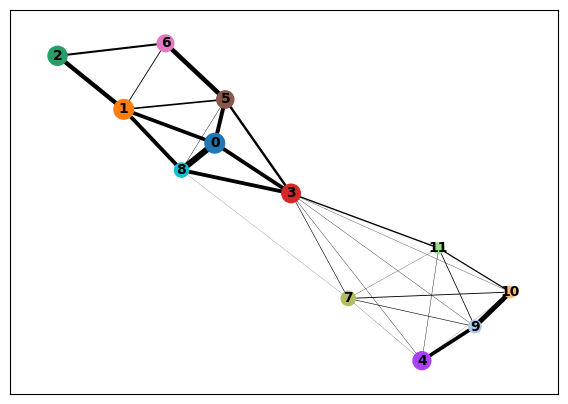

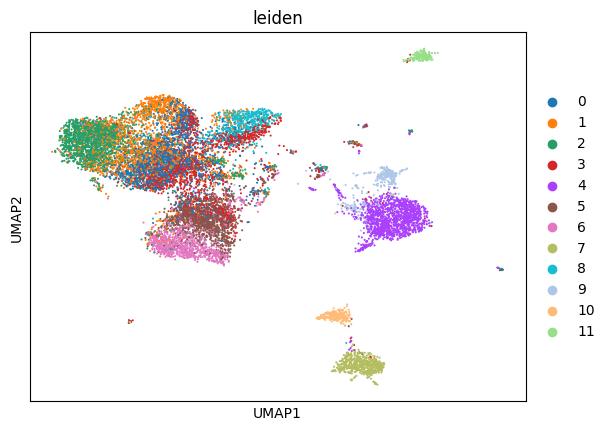

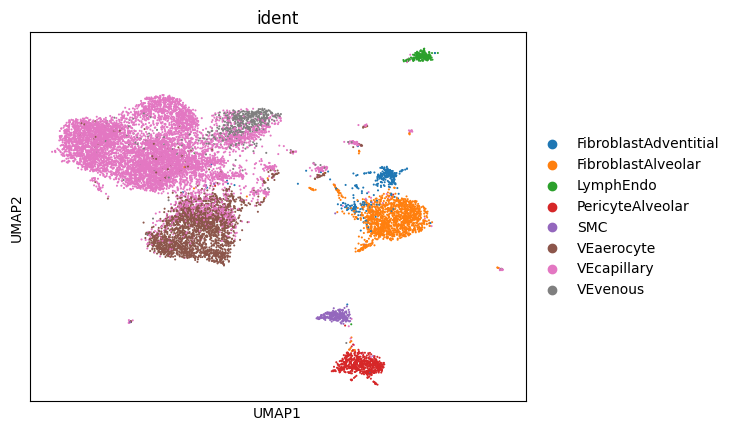

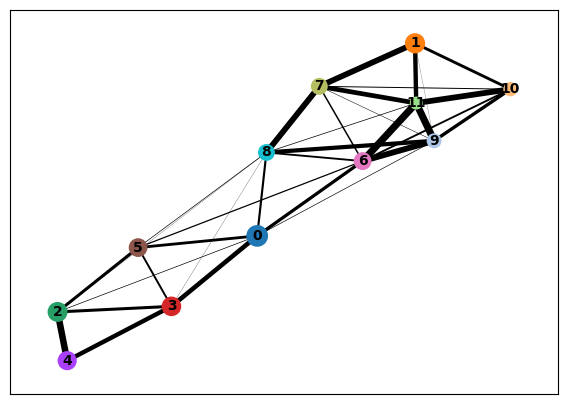

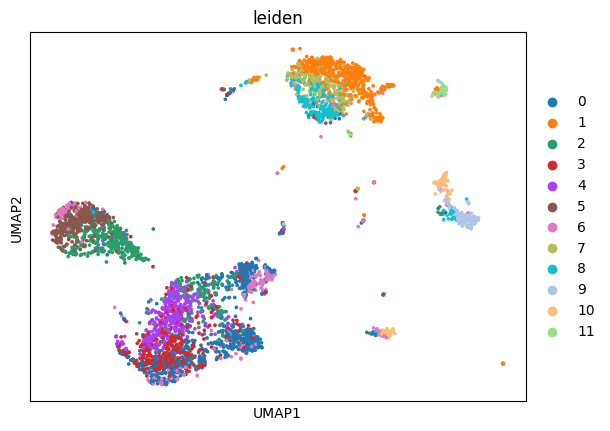

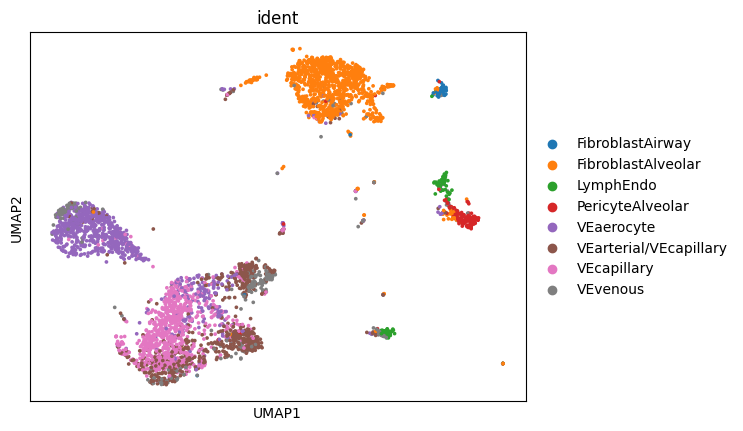

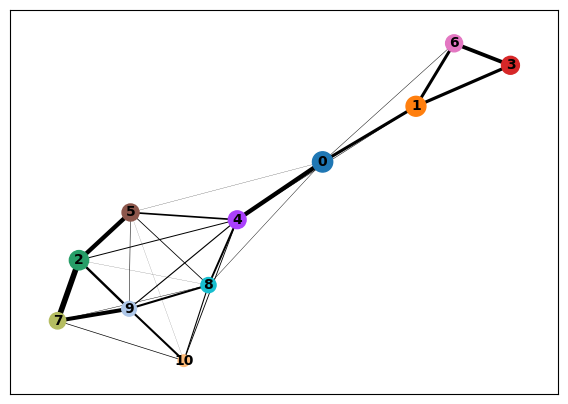

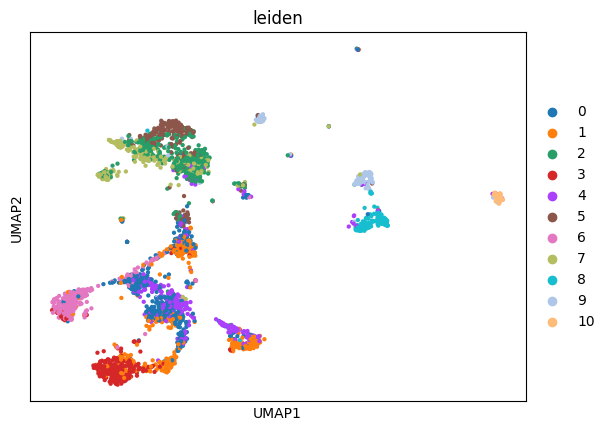

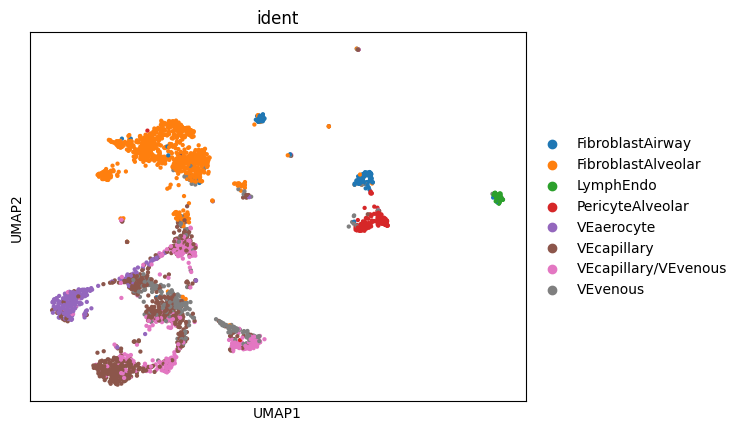

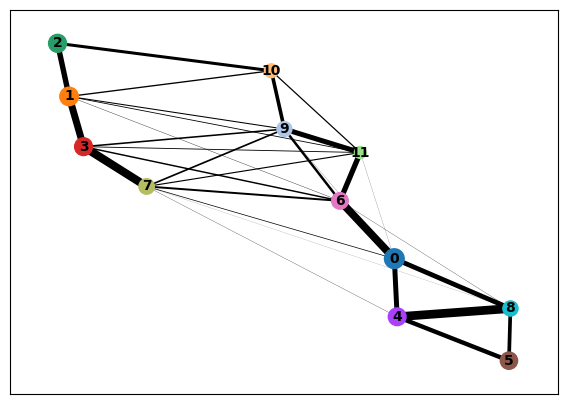

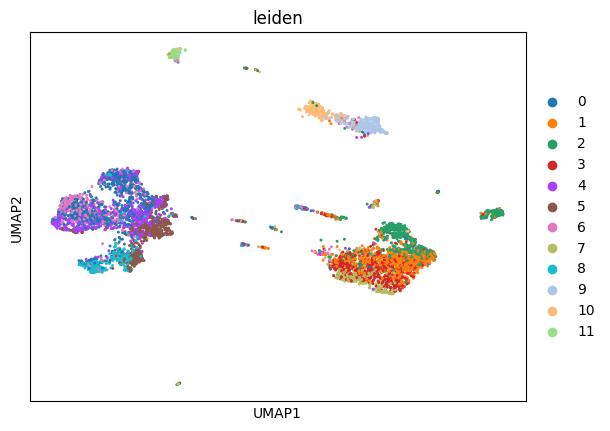

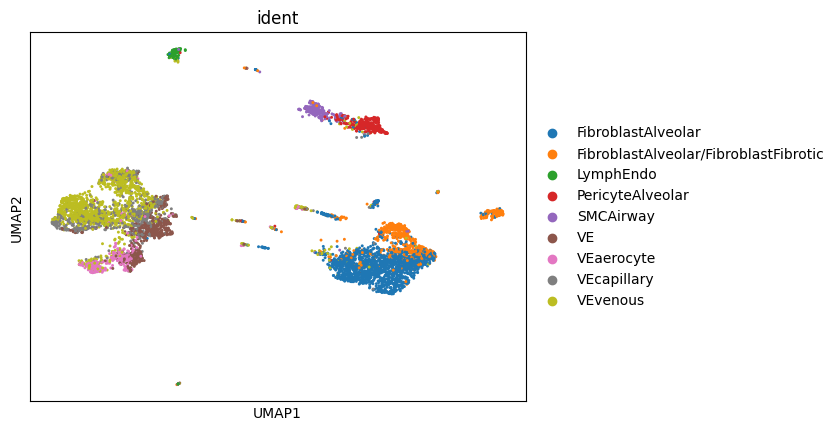

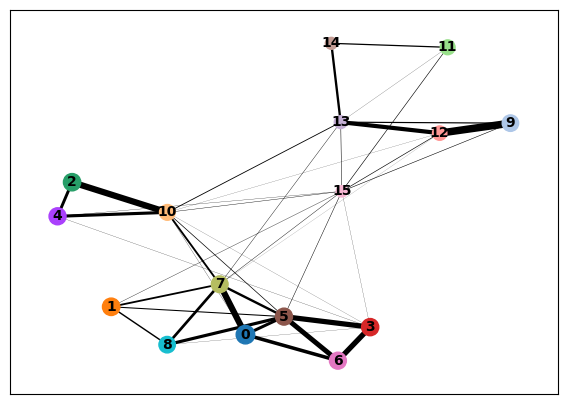

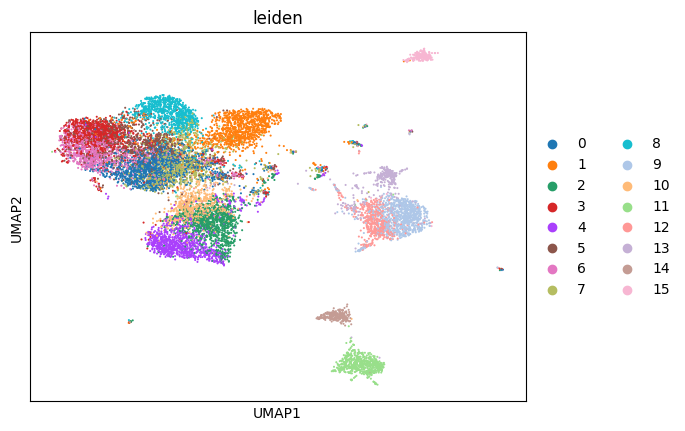

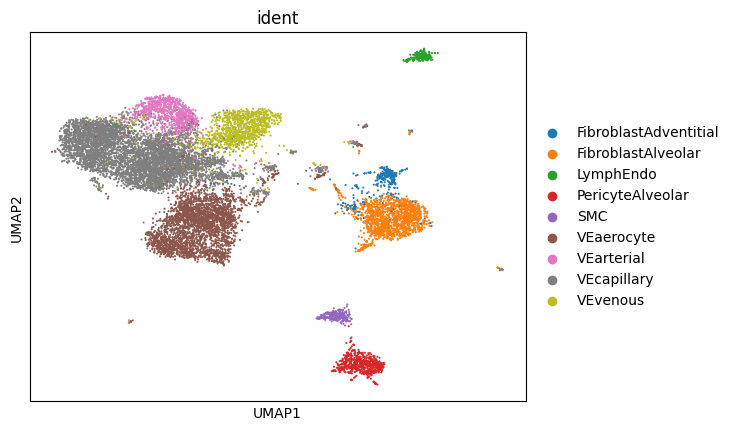

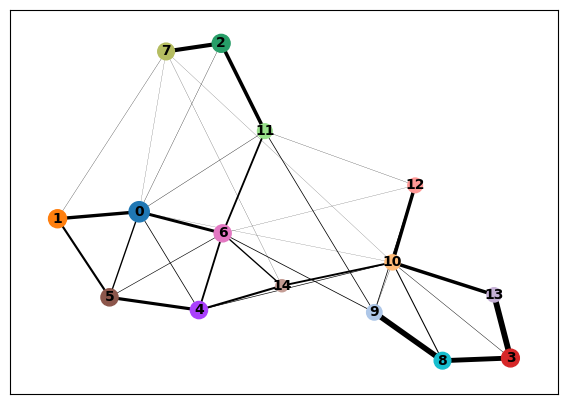

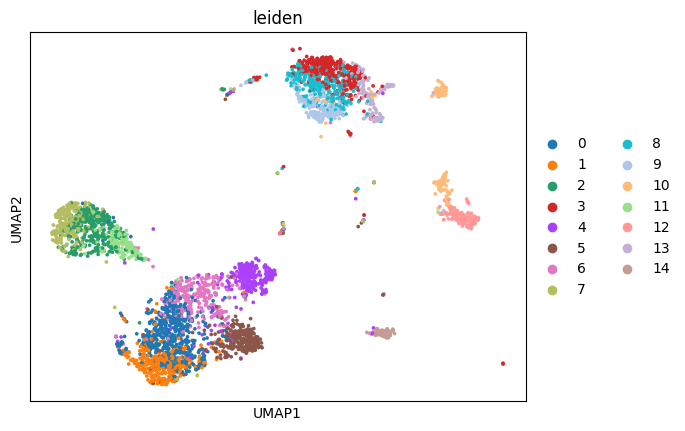

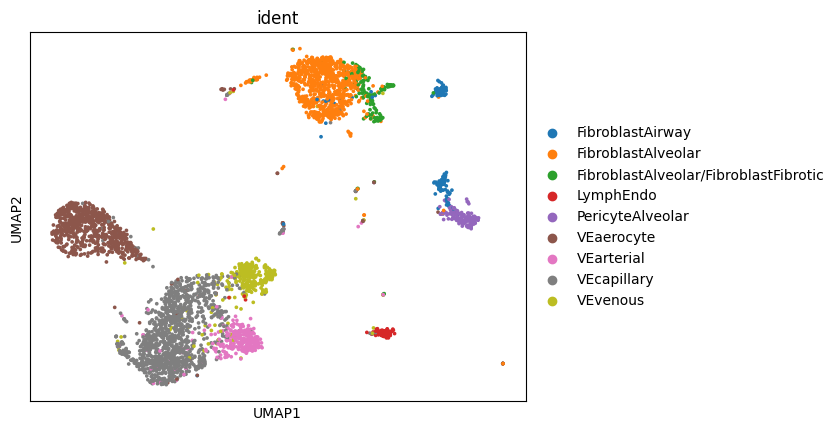

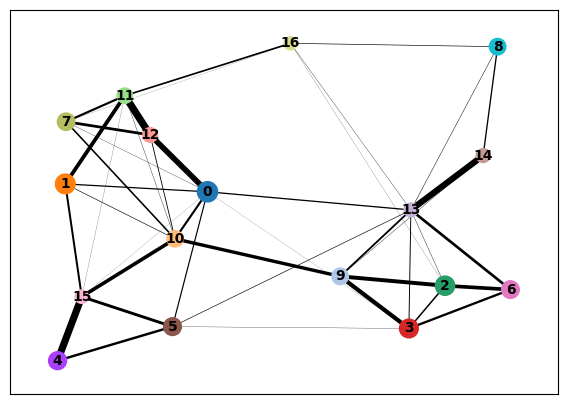

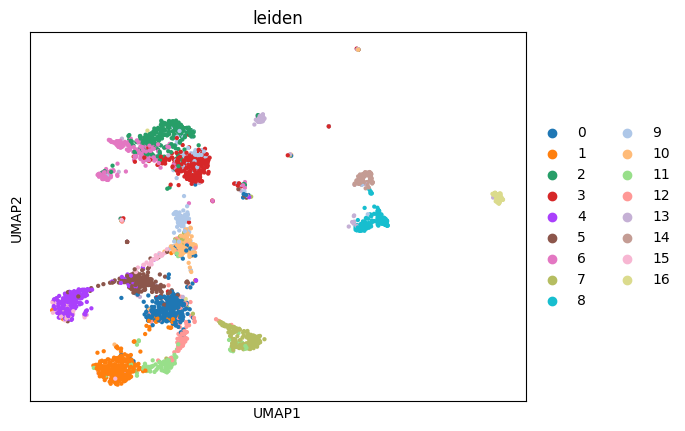

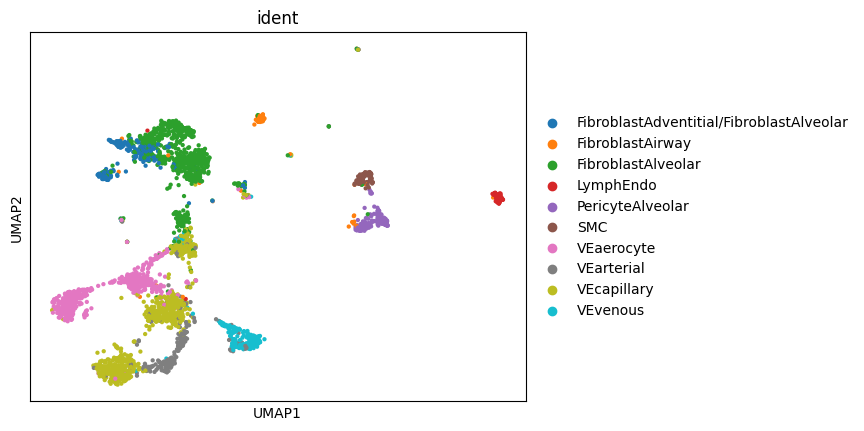

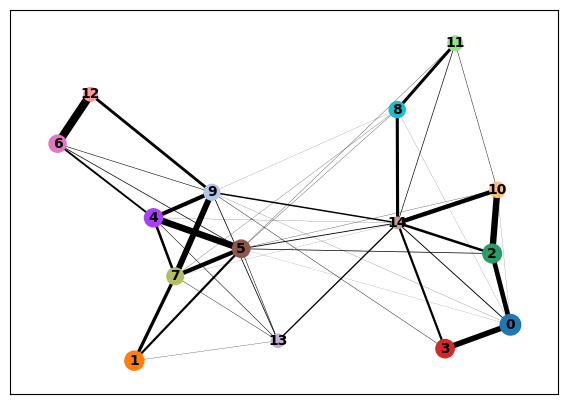

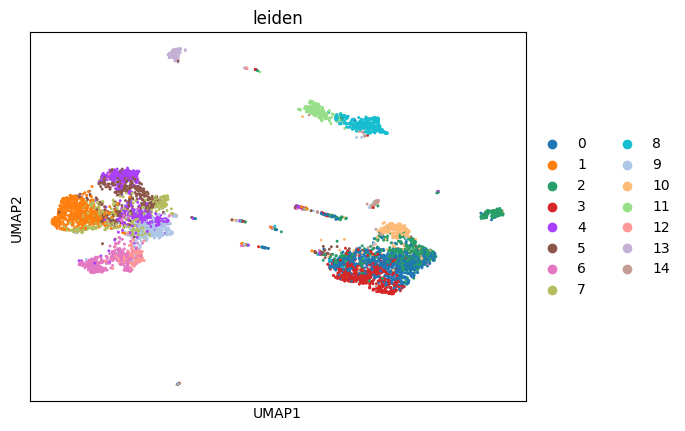

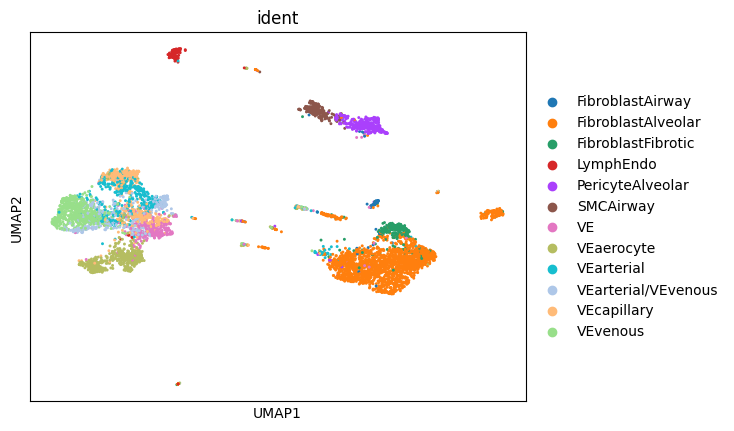

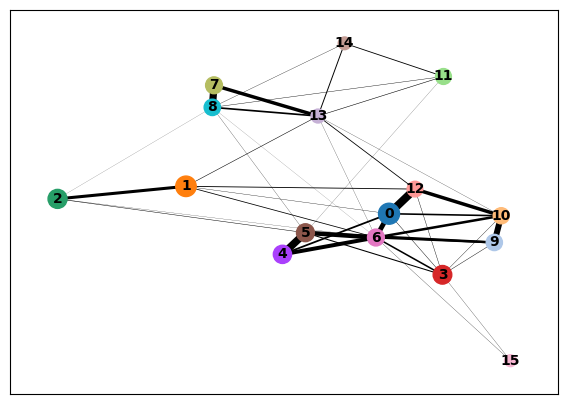

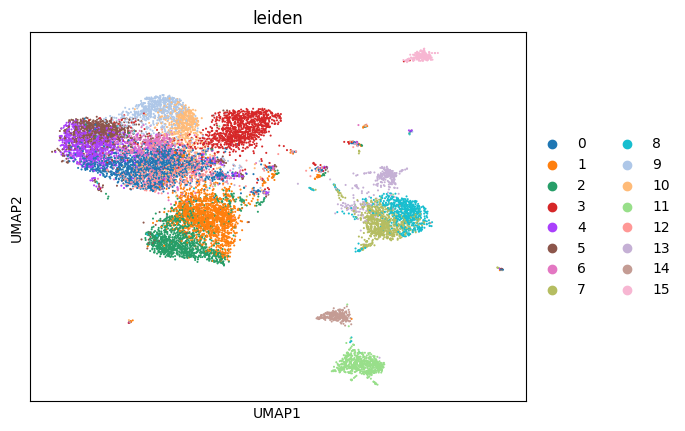

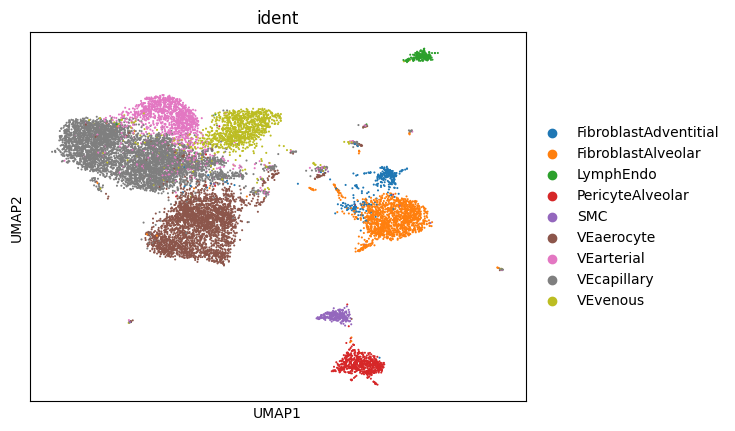

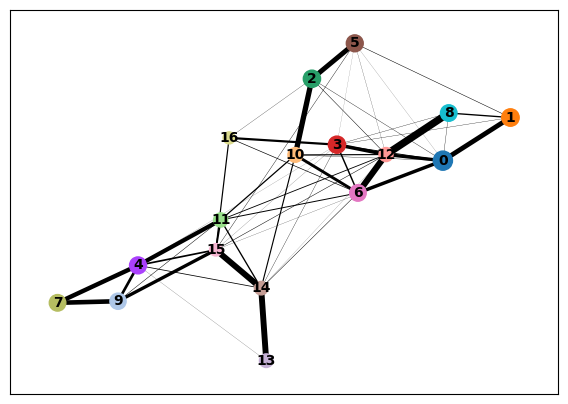

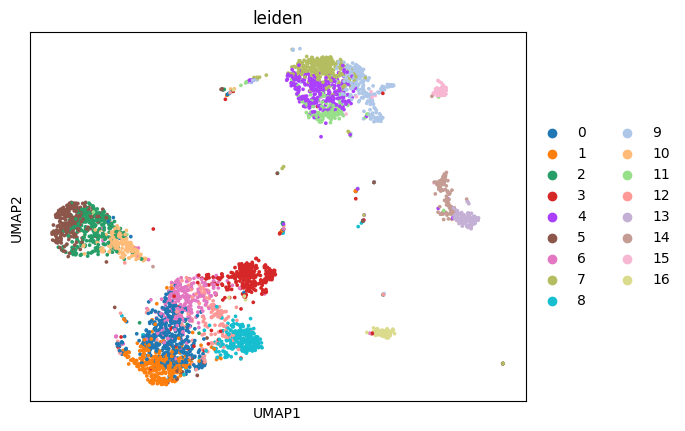

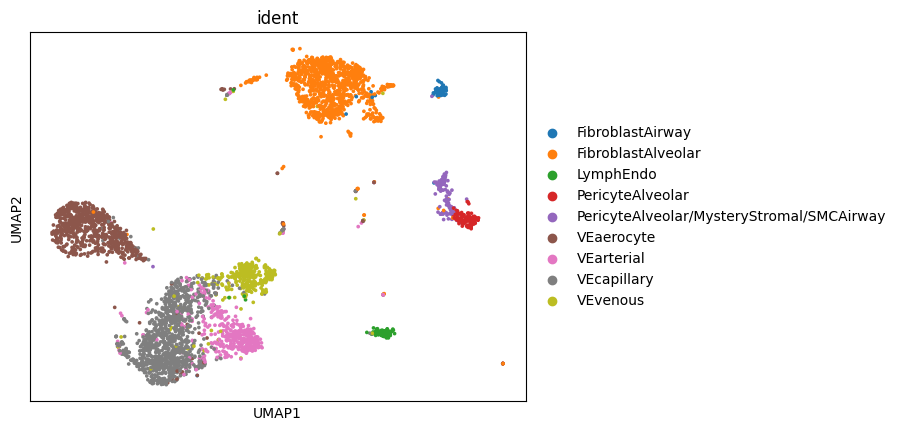

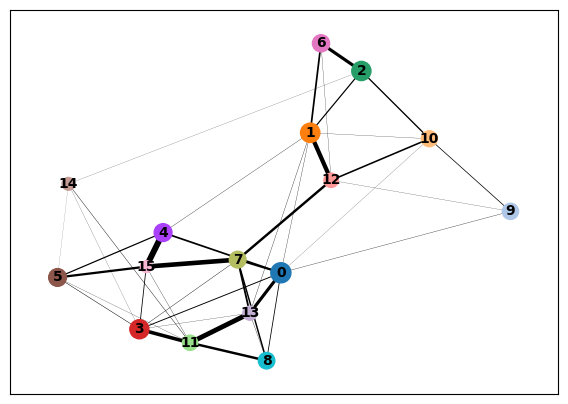

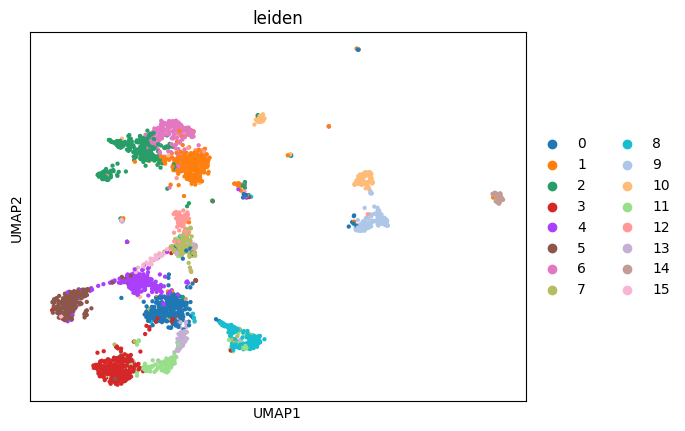

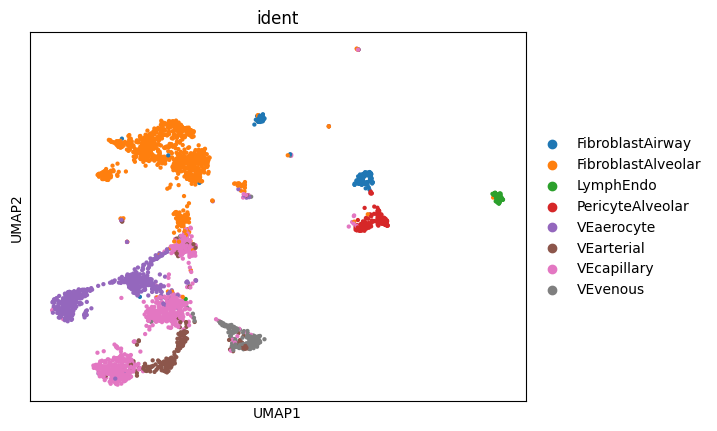

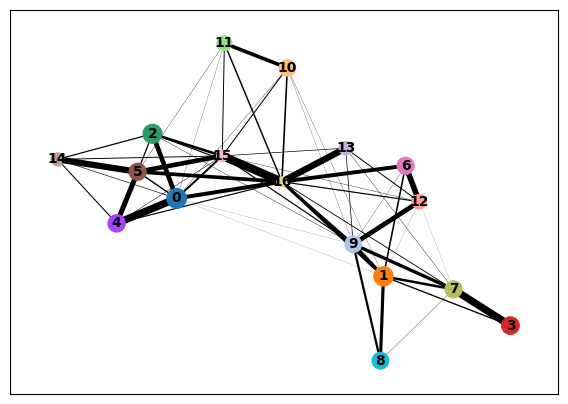

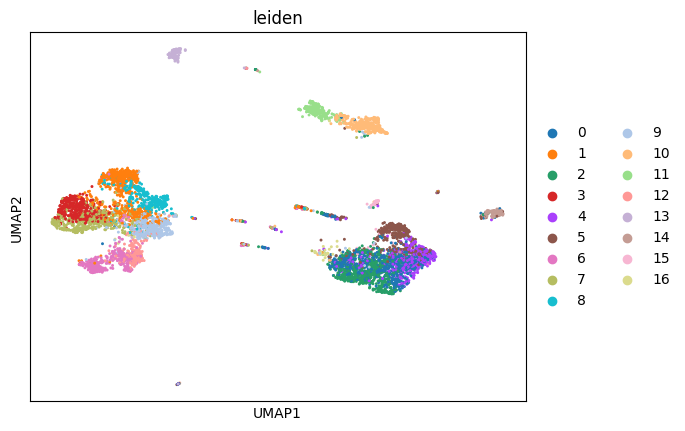

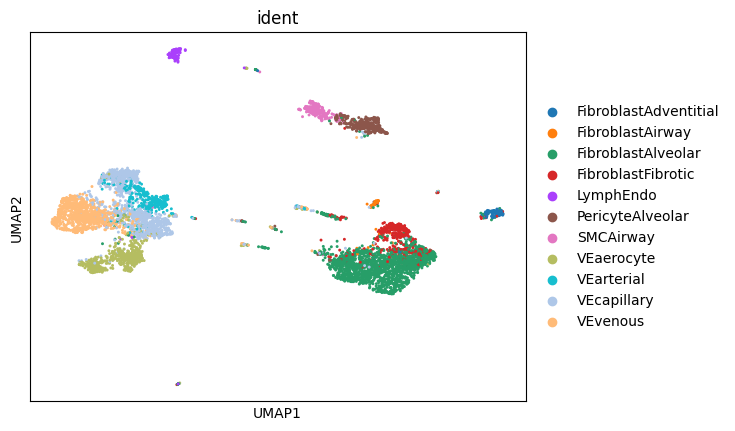

In [4]:
unagi.setup_training(
    task='example', dist='ziln', device='cuda:0',
    GPU=True, epoch_iter=5, epoch_initial=1,
    max_iter=3, BATCHSIZE=560)
unagi.run_UNAGI(idrem_dir = '../idrem')

## Part 3: Perform in-silico perturbations and downstream analysis

After training the UNAGI model, you can perfrom downstream tasks including hierarchical static marker discovries 
parameters:

1. data_path: the directory of the dataset generated by UNAGI
2. iteration: the iteration of the dataset belongs to
3. progressionmarker_background_sampling_times: the number of sampling times to generate the dynamic marker backgrounds
4. target_dir: the directory to store the downstream analysis results and h5ad files
5. customized_drug: the directory to customized drug profile
6. cmap_dir: the directory to the precomputed CMAP database which contains the drug/compounds and their regualted genes and regualated directions.

**NOTE**: Please download `cmap_drug_target.npy` and `cmap_direction_df.npy` from [here](https://zenodo.org/records/15692608).

In [10]:
unagi.analyse_UNAGI(
    data_path='../UNAGI/data/example/2/stagedata/dataset.h5ad',
    iteration=2,
    progressionmarker_background_sampling_times=10,
    run_pertubration=True,  # or False if you want to skip perturbation
    target_dir=None,
    customized_drug='/datasets/dcfm_project/processed_cmap_for_unagi/cmap_drug_target.npy',
    cmap_dir='/datasets/dcfm_project/processed_cmap_for_unagi/cmap_direction_df.npy'
)


AnnData object with n_obs × n_vars = 27647 × 2484
    obs: 'barcode', 'nUMI', 'nGene', 'percMito', 'percSpliced.v', 'percUnspliced.v', 'percAmbiguous.v', 'Sample.ID', 'Subject.ID', 'Sex', 'Age', 'Surface.Density', 'Percent.Tissue', 'Disease.Ident', 'nCount_RNA', 'final.ident', 'nFeature_RNA', 'nCount_integrated', 'nFeature_integrated', 'name.simple', 'Library.Ident', 'renamedFin', 'integrated_snn_res.2', 'seurat_clusters', 'renamed.2', 'integrated_snn_res.3', 'log10UMI', 'renamed.3', 'stage', 'leiden', 'ident'
    var: 'features'
    uns: 'clusterType', 'edges', 'topGene', 'top_gene_fold_change', 'top_gene_pvals_adj'
    obsm: 'X_umap', 'umap', 'z'
    layers: 'geneWeight'
    obsp: 'gcn_connectivities'
calculate hierarchical markers.....


mkdir: cannot create directory ‘./example_2’: File exists


hierarchical static markers done
calculateDataPathwayOverlapGene done
calculateTopPathwayGeneRanking done
getting Target genes from  13-9n15-2-5n14.txt_viz
getting Target genes from  2-2n10-5n15-12.txt_viz


mkdir: cannot create directory ‘./example_2/model_save’: File exists


getting Target genes from  4-0-3-9.txt_viz
getting Target genes from  9-8n12-11n13-8.txt_viz
getting Target genes from  7-7n11-1-0n4.txt_viz
getting Target genes from  3-3-8-3n7.txt_viz
getting Target genes from  8-4-6n12-2.txt_viz
getting Target genes from  11-13-9-10.txt_viz
getting Target genes from  0-1n6-0n7-1.txt_viz
getting Target genes from  14-14-10-11n15.txt_viz
getting Target genes from  1-5-4-6n16.txt_viz
getting Target genes from  15-16-14-13.txt_viz
Dynamic markers discovery.....done....
using customized drug profile: /datasets/dcfm_project/processed_cmap_for_unagi/cmap_drug_target.npy
using cutomized drug dirction: /datasets/dcfm_project/processed_cmap_for_unagi/cmap_drug_target.npy
Start perturbation....


100%|███████████████████████████████████████████████████████████████████████████████████████| 1856/1856 [22:02<00:00,  1.40it/s]


finished
pathway perturbatnion done
building random background for pathways....


100%|███████████████████████████████████████████████████████████████████████████████████████| 1856/1856 [22:24<00:00,  1.38it/s]


finished
score weight: 100


100%|█████████████████████████████████████████████████████████████████████████████████████████| 238/238 [02:53<00:00,  1.37it/s]


finished
drug perturabtion done


11it [00:07,  1.38it/s]                                                                                                         
11it [00:08,  1.37it/s]                                                                                                         


score weight: 100
analysis of drug perturbation
The analysis has been done, please check the outputs!


In [8]:
os.listdir('../UNAGI/data/example/2/stagedata/')

['dataset.h5ad',
 '2.h5ad',
 '3.h5ad',
 'rep.npy',
 '1.h5ad',
 '0.h5ad',
 'attribute.pkl']